In [1]:
import pandas as pd

data = pd.read_csv("multishapes.csv")
#print(data)
print(data.head())

          x         y
0 -0.803739 -0.853053
1  0.852851  0.367618
2  0.927180 -0.274902
3 -0.752626 -0.511565
4  0.706846  0.810679


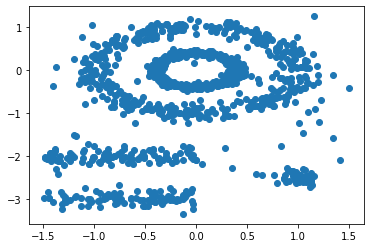

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data.loc[:,"x"] , data.loc[:,"y"])
plt.show()

In [3]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=2).fit(data)
print(model)

NearestNeighbors(n_neighbors=2)


In [4]:
distances = model.kneighbors(data)
print(distances)

(array([[0.        , 0.0279133 ],
       [0.        , 0.06016311],
       [0.        , 0.0364806 ],
       ...,
       [0.        , 0.01079333],
       [0.        , 0.04274495],
       [0.        , 0.01011126]]), array([[   0,  329],
       [   1,  212],
       [   2,  222],
       ...,
       [1097, 1059],
       [1098, 1074],
       [1099, 1079]], dtype=int64))


In [5]:
distances = distances[0] 
print(distances)

[[0.         0.0279133 ]
 [0.         0.06016311]
 [0.         0.0364806 ]
 ...
 [0.         0.01079333]
 [0.         0.04274495]
 [0.         0.01011126]]


In [6]:
import numpy as np
distances = np.sort(distances[:,1])
print(distances)

[0.00154757 0.00154757 0.0015648  ... 0.3731041  0.4082026  0.51336079]


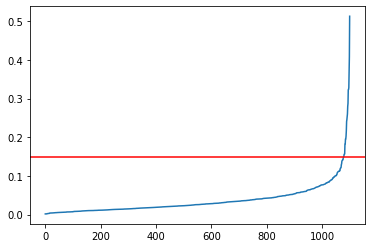

In [7]:
from matplotlib import pyplot as plt

plt.plot(distances)
plt.axhline(y=0.15, color='r', linestyle='-')

In [8]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.15, min_samples=5)
label = model.fit_predict(data)
print("clustering=", label)

clustering= [0 0 0 ... 4 4 4]


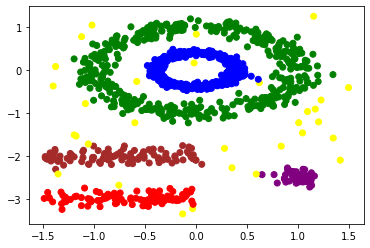

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

label = label
colors = ['yellow','green', 'blue', 'brown', 'red', 'purple'] # need 6 colors including outliers
plt.scatter(data.loc[:,"x"] , data.loc[:,"y"], c=label, cmap=ListedColormap(colors))
# plt.axis("scaled") # equal x and y scales
# plt.savefig("DBSCAN.pdf")
plt.show()